In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

data = pd.read_csv('/content/drive/MyDrive/Machine learning Lab/insurance.csv')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# prompt: do label encoding

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
categorical_cols = ['sex', 'smoker','region']  # Replace with actual categorical column names
for col in categorical_cols:
  data[col] = label_encoder.fit_transform(data[col])

# Display the modified DataFrame
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [9]:
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [11]:
# prompt: remove Outliers using IQR

# Calculate IQR for each numerical column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
data_no_outliers = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

# Display the DataFrame without outliers
print(data_no_outliers)


      age  sex     bmi  children  smoker  region      charges
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
5      31    0  25.740         0       0       2   3756.62160
...   ...  ...     ...       ...     ...     ...          ...
1332   52    0  44.700         3       0       3  11411.68500
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500

[1055 rows x 7 columns]


In [13]:
# prompt: remove outliers using z sqaure

import numpy as np
# Calculate z-scores for all numerical columns
numeric_cols = ['age', 'bmi', 'children', 'charges']
z_scores = np.abs((data[numeric_cols] - data[numeric_cols].mean()) / data[numeric_cols].std())

# Set a threshold for outlier detection (e.g., z-score > 3)
threshold = 3

# Filter data to remove outliers based on z-scores
data_no_outliers_z = data[(z_scores < threshold).all(axis=1)]

# Display the DataFrame without outliers (using z-score method)
print(data_no_outliers_z)

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1309 rows x 7 columns]


In [14]:
# prompt: save z square file in drive

# Assuming you want to save the DataFrame 'data_no_outliers_z' to a CSV file
data_no_outliers_z.to_csv('/content/drive/MyDrive/Machine learning Lab/insurance_no_outliers_z.csv', index=False)

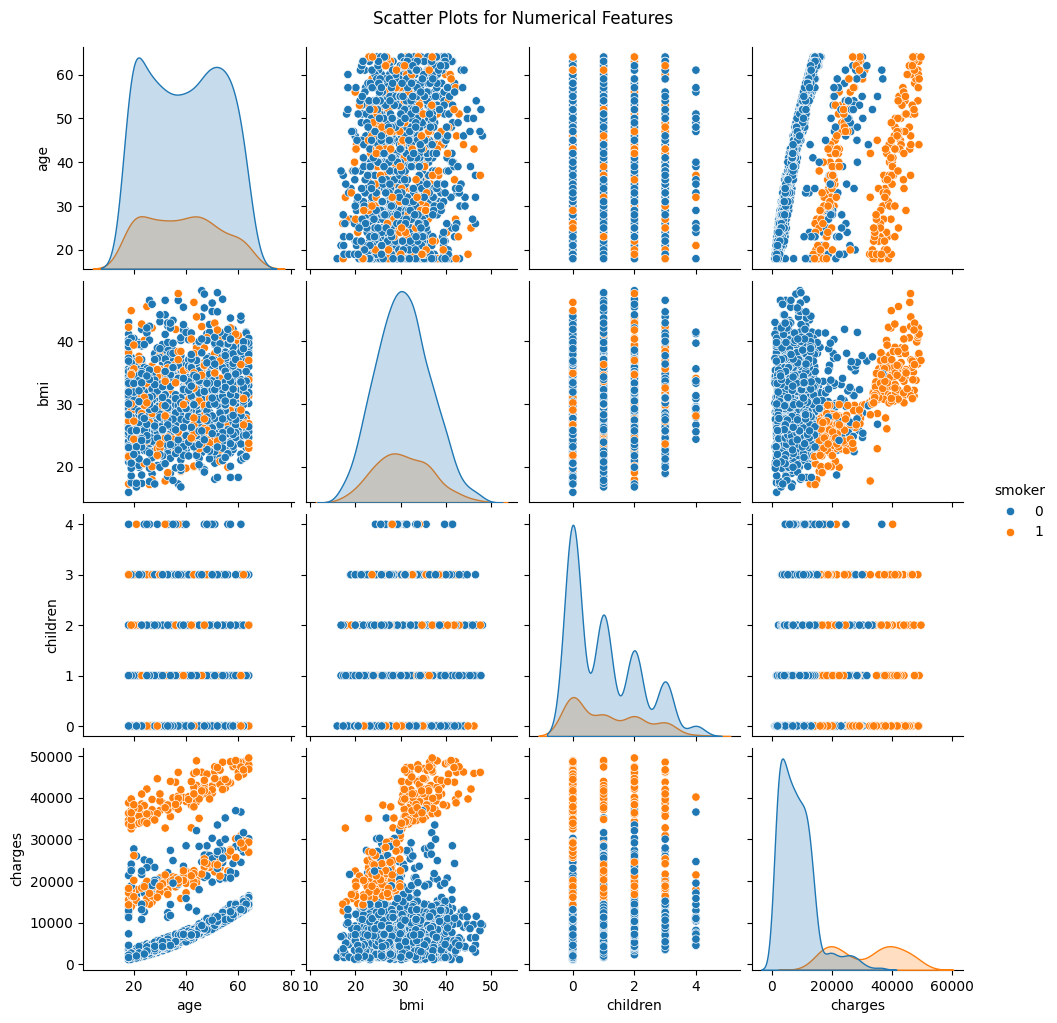

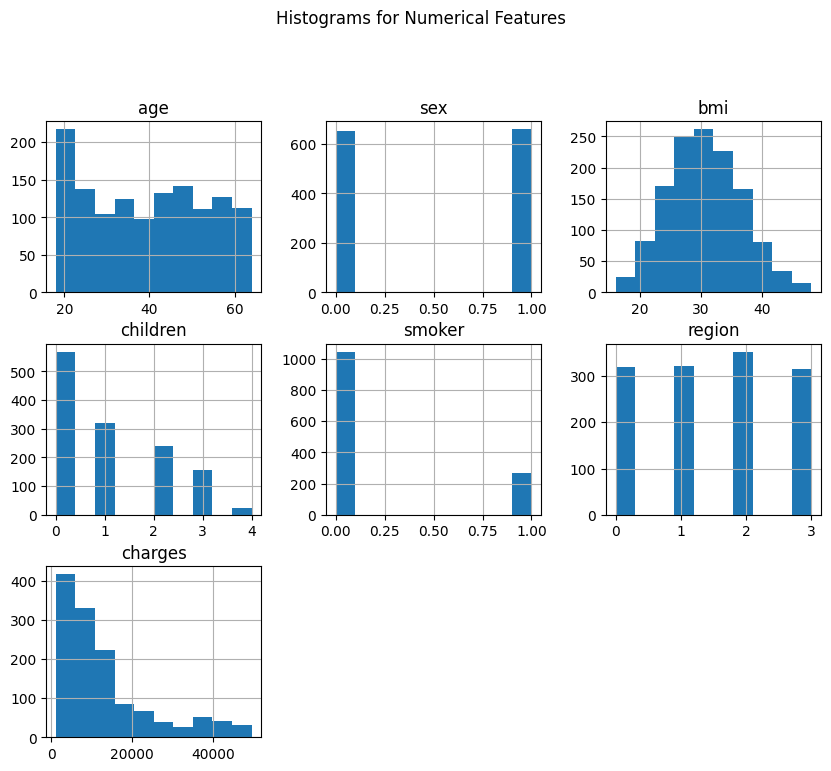

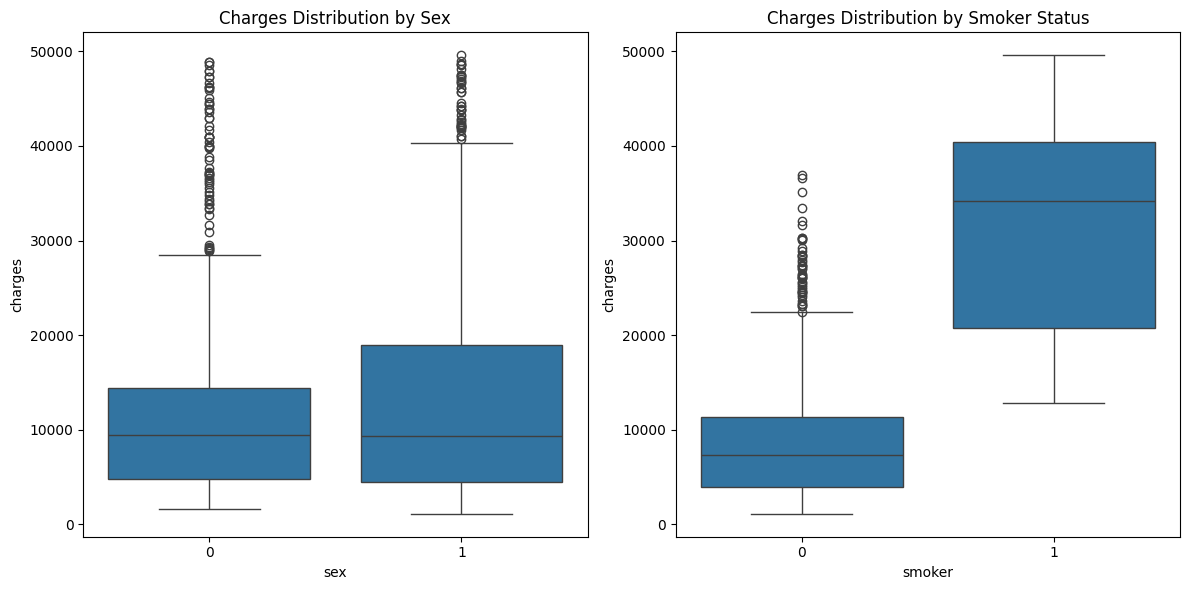

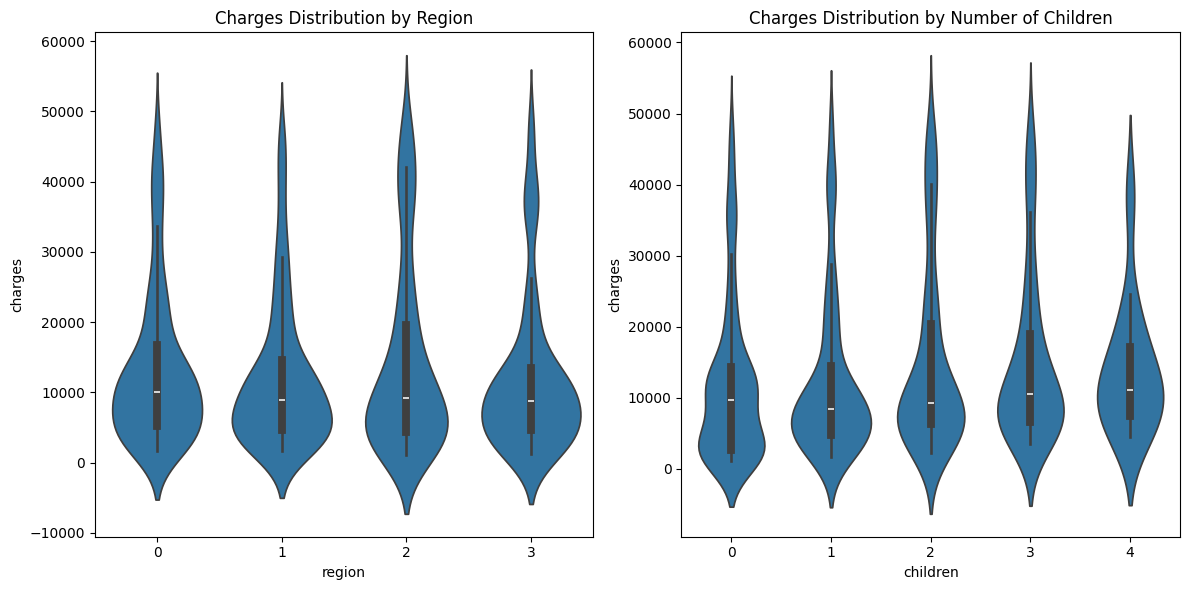

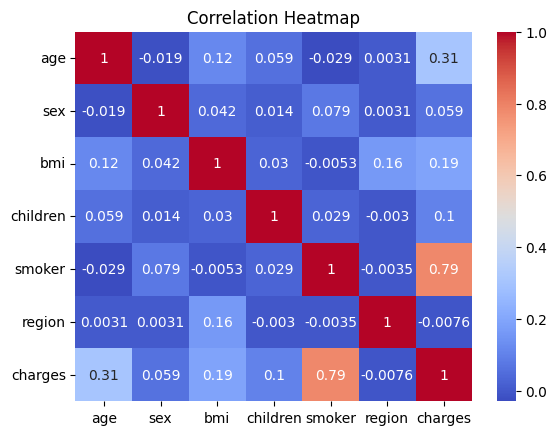

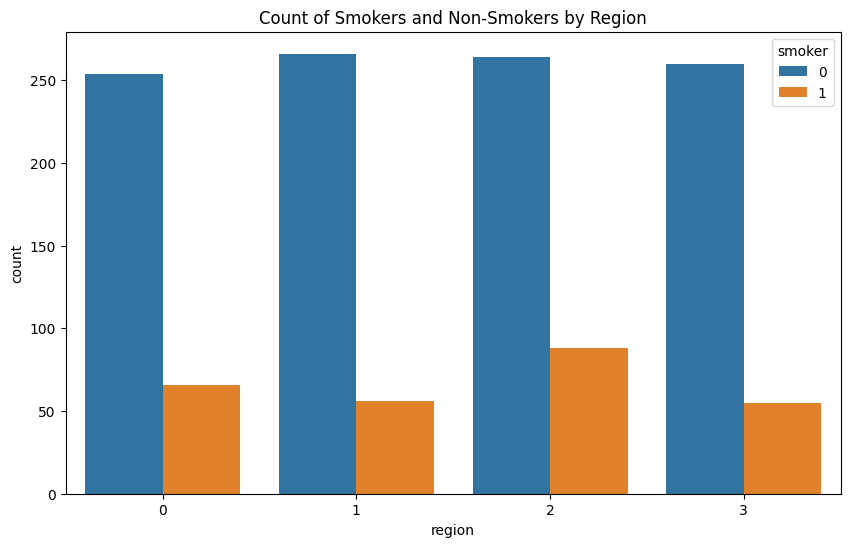

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 23.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


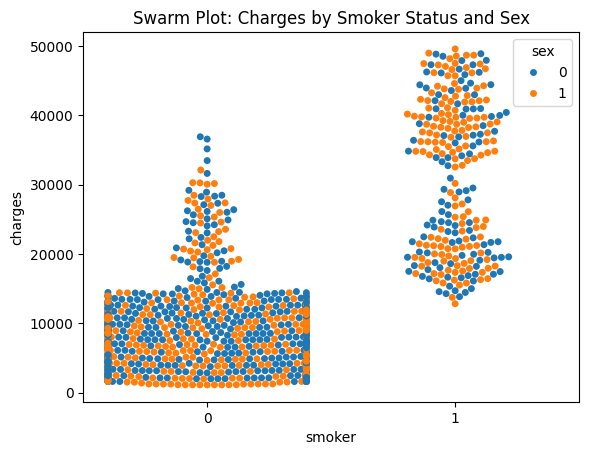

In [25]:
# prompt: give me all types of plot for dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code)

# 1. Scatter Plots for Numerical Features
sns.pairplot(data_no_outliers_z, vars=['age', 'bmi', 'children', 'charges'], hue='smoker')
plt.suptitle("Scatter Plots for Numerical Features", y=1.02)
plt.show()

# 2. Histograms for Numerical Features
data_no_outliers_z.hist(figsize=(10, 8))
plt.suptitle("Histograms for Numerical Features", y=1.02)
plt.show()

# 3. Box Plots for Categorical Features vs. Charges
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='sex', y='charges', data=data_no_outliers_z)
plt.title("Charges Distribution by Sex")

plt.subplot(1, 2, 2)
sns.boxplot(x='smoker', y='charges', data=data_no_outliers_z)
plt.title("Charges Distribution by Smoker Status")

plt.tight_layout()
plt.show()

# 4. Violin Plots for Categorical Features vs. Charges
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='region', y='charges', data=data_no_outliers_z)
plt.title("Charges Distribution by Region")

plt.subplot(1, 2, 2)
sns.violinplot(x='children', y='charges', data=data_no_outliers_z)
plt.title("Charges Distribution by Number of Children")

plt.tight_layout()
plt.show()

# 5. Correlation Heatmap
corr_matrix = data_no_outliers_z.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 6. Count Plot for Categorical Features
plt.figure(figsize=(10, 6))
sns.countplot(x='region', hue='smoker', data=data_no_outliers_z)
plt.title("Count of Smokers and Non-Smokers by Region")
plt.show()

# 7. Swarm Plot for Age vs. Charges with Hue for Smoker Status
sns.swarmplot(x='smoker', y='charges', hue='sex', data=data_no_outliers_z)
plt.title("Swarm Plot: Charges by Smoker Status and Sex")
plt.show()


Mean Squared Error: 30496851.7495746
R-squared: 0.7783539090730871


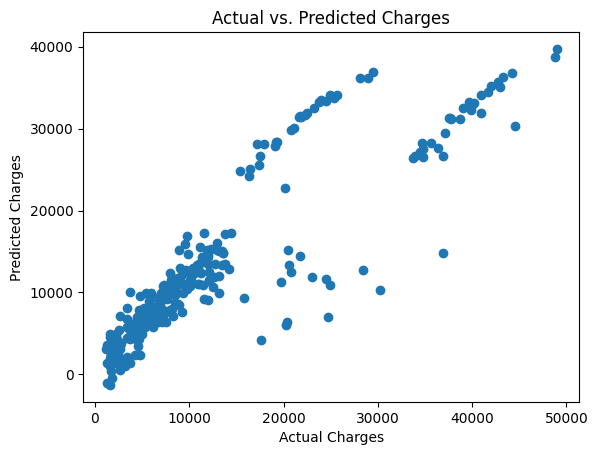

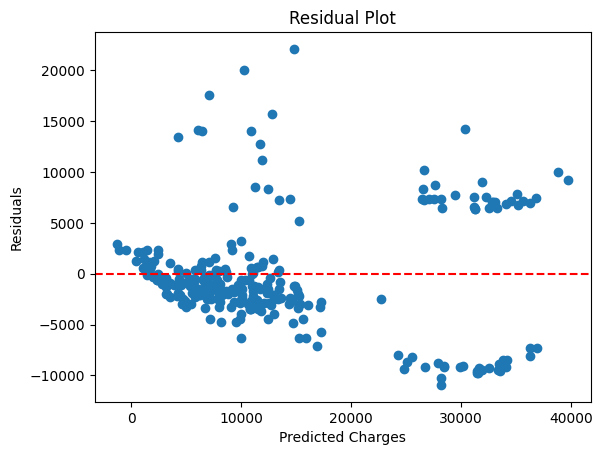

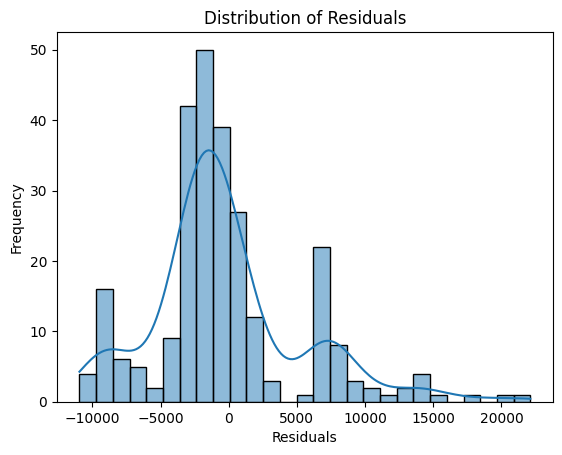

In [23]:
# prompt: perform linear regression on z square data and visaulize suitable graphs

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'data_no_outliers_z' is your DataFrame without outliers
# Select features and target variable
X = data_no_outliers_z.drop('charges', axis=1)  # Replace 'charges' with your target variable column name
y = data_no_outliers_z['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize the results (example plots)

# 1. Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")
plt.show()

# 2. Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# 3. Distribution of residuals
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


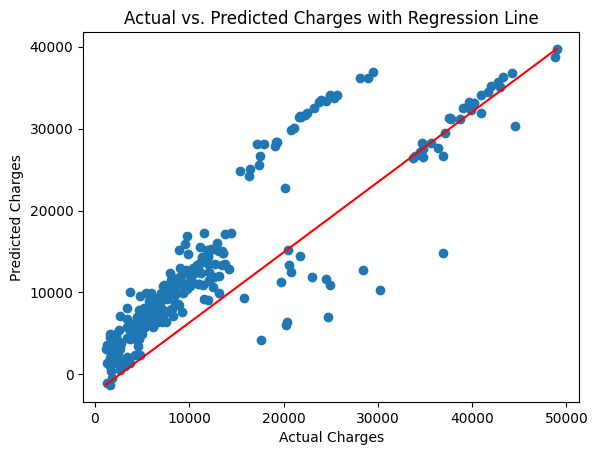

In [24]:
# prompt: draw linear regression line

import matplotlib.pyplot as plt
# Assuming you have already fitted the Linear Regression model and made predictions

# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges with Regression Line")

# Plot the regression line
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red')

plt.show()
